<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 147.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 163.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 150.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 148.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 77.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 144.7 MB/s eta 0:00:00


<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


In [3]:
print(df['MainBranch'].unique())

['I am a developer by profession' 'I am learning to code'
 'I code primarily as a hobby'
 'I am not primarily a developer, but I write code sometimes as part of my work/studies'
 'I used to be a developer by profession, but no longer am']


In [4]:
# 获取所有列名
column_names = df.columns.tolist()

# 打印所有列名
print(column_names)

['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',

In [5]:
print(df['Industry'].unique())

[nan 'Healthcare' 'Software Development' 'Banking/Financial Services'
 'Other:' 'Media & Advertising Services' 'Insurance'
 'Internet, Telecomm or Information Services' 'Higher Education' 'Energy'
 'Fintech' 'Retail and Consumer Services' 'Manufacturing' 'Government'
 'Computer Systems Design and Services' 'Transportation, or Supply Chain']


In [6]:
df_one = df['Industry'].value_counts()
print(df_one)

Industry
Software Development                          11918
Other:                                         3077
Fintech                                        1641
Internet, Telecomm or Information Services     1629
Banking/Financial Services                     1371
Healthcare                                     1277
Manufacturing                                  1265
Retail and Consumer Services                   1264
Government                                      962
Media & Advertising Services                    894
Higher Education                                890
Transportation, or Supply Chain                 859
Computer Systems Design and Services            844
Energy                                          578
Insurance                                       389
Name: count, dtype: int64


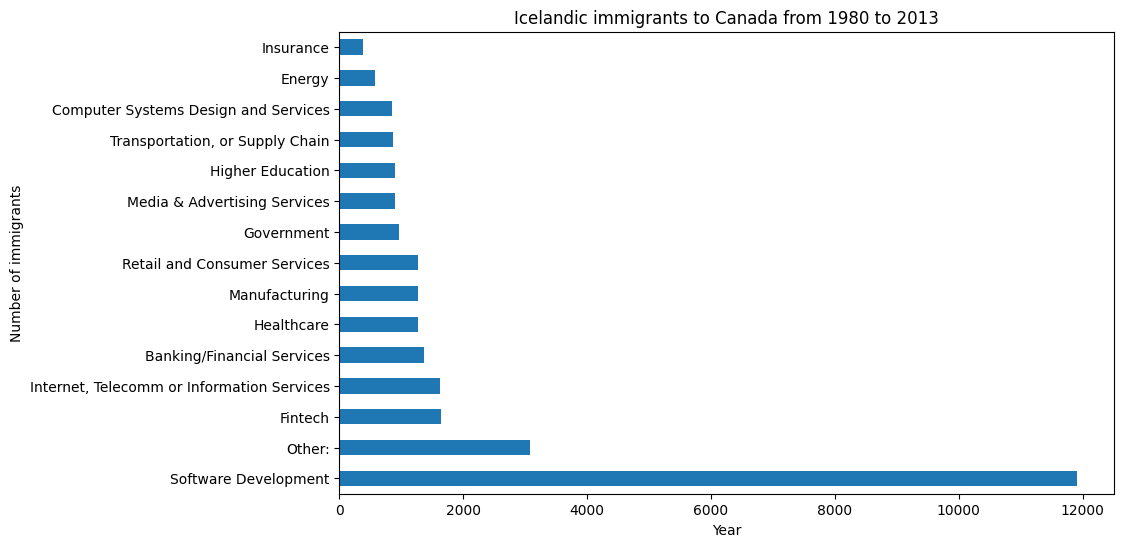

In [7]:
df_one.plot(kind='barh', figsize=(10, 6))

plt.xlabel('Year')
plt.ylabel('Number of immigrants')
plt.title('Icelandic immigrants to Canada from 1980 to 2013')

plt.show()

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [9]:
print(df['ConvertedCompYearly'].describe())

count    2.343500e+04
mean     8.615529e+04
std      1.867570e+05
min      1.000000e+00
25%      3.271200e+04
50%      6.500000e+04
75%      1.079715e+05
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64


In [10]:
import numpy as np

In [15]:
# 计算 Z-score
Comp_mean = df['ConvertedCompYearly'].mean()
Comp_std = df['ConvertedCompYearly'].std()
Comp_z_scores = (df['ConvertedCompYearly'] - Comp_mean) / Comp_std

# 找出 Z-score 大于 3 或小于 -3 的异常值
Comp_outliers = df[(np.abs(Comp_z_scores) > 3)]
print(Comp_outliers['ConvertedCompYearly'])

529       650000.0
828      1000000.0
1932      945000.0
2171      750000.0
2187     2000000.0
           ...    
38219    1000000.0
39643    1300000.0
40066     800000.0
40952     750000.0
41027     700000.0
Name: ConvertedCompYearly, Length: 89, dtype: float64


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


In [18]:
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 找出低于 Q1 - 1.5 * IQR 或高于 Q3 + 1.5 * IQR 的异常值
Comp_outliers_one = df[(df['ConvertedCompYearly'] < lower_bound) | (df['ConvertedCompYearly'] > upper_bound)]
print(Comp_outliers_one['ConvertedCompYearly'])

428      230000.0
456      300000.0
461      254425.0
529      650000.0
545      400000.0
           ...   
40952    750000.0
41000    235000.0
41001    260000.0
41027    700000.0
41187    222834.0
Name: ConvertedCompYearly, Length: 978, dtype: float64


<Axes: ylabel='ConvertedCompYearly'>

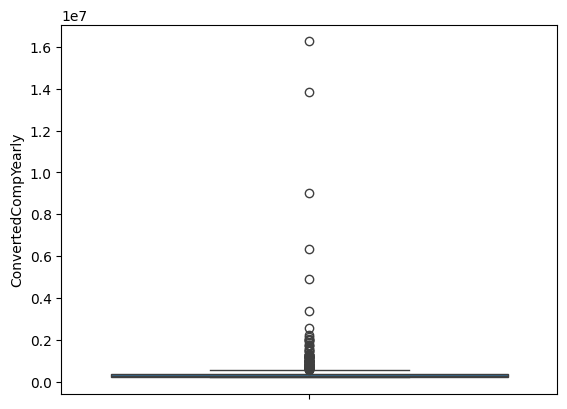

In [19]:
sns.boxplot(y='ConvertedCompYearly', data=Comp_outliers_one)

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [20]:
##Write your code here
df_no_outliers = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]

<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


In [22]:
##Write your code here
numeric_cols = df_no_outliers.select_dtypes(include='number').columns.tolist()
print(numeric_cols)

['ResponseId', 'CompTotal', 'WorkExp', 'JobSatPoints_1', 'JobSatPoints_4', 'JobSatPoints_5', 'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9', 'JobSatPoints_10', 'JobSatPoints_11', 'ConvertedCompYearly', 'JobSat']


In [23]:
print(df['Age'].unique())

['Under 18 years old' '35-44 years old' '45-54 years old'
 '18-24 years old' '25-34 years old' '55-64 years old' 'Prefer not to say'
 '65 years or older']


In [27]:
# 定义年龄区间的映射字典
age_mapping = {
    'Under 18 years old': 13,   # 取中间值 17.5 向下取整
    '18-24 years old': 21,     # 取中间值 21
    '25-34 years old': 30,     # 取中间值 29.5 向下取整
    '35-44 years old': 40,     # 取中间值 39.5 向下取整
    '45-54 years old': 50,     # 取中间值 49.5 向下取整
    '55-64 years old': 60,     # 取中间值 59.5 向下取整
    '65 years or older': 70,   # 取中间值 67.5 向下取整
    'Prefer not to say': None  # 如果不想透露，则设置为 None 或其他合适的值
}

# 使用 map 方法进行映射
df_no_outliers['Age_Numeric'] = df_no_outliers['Age'].map(age_mapping)

print(df_no_outliers['Age_Numeric'])

72       21.0
374      30.0
379      40.0
385      40.0
389      30.0
         ... 
41179    30.0
41180    30.0
41184    50.0
41185    40.0
41186    21.0
Name: Age_Numeric, Length: 22457, dtype: float64


/tmp/ipykernel_306/1194302769.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Age_Numeric'] = df_no_outliers['Age'].map(age_mapping)


In [25]:
numeric_cols = df_no_outliers.select_dtypes(include='number').columns.tolist()
print

In [26]:
df_no_outliers[numeric_cols].corr()

,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
ResponseId,1.000000,-0.014098,-0.039416,0.014194,0.002130,0.007478,0.008950,0.020057,0.004989,0.022193,0.011755,0.011030,-0.012948,-0.020004
CompTotal,-0.014098,1.000000,-0.018013,0.017761,0.004478,0.025861,0.011577,0.022383,0.010580,0.007242,0.011561,0.018388,0.030847,-0.007520
WorkExp,-0.039416,-0.018013,1.000000,-0.032388,-0.057005,-0.094126,-0.063702,-0.097756,-0.047072,-0.088181,-0.105905,-0.101986,0.408438,0.092493
JobSatPoints_1,0.014194,0.017761,-0.032388,1.000000,0.430698,0.634049,0.617106,0.600079,0.623773,0.597856,0.586337,0.613106,-0.058170,0.091201
JobSatPoints_4,0.002130,0.004478,-0.057005,0.430698,1.000000,0.508031,0.425768,0.437171,0.419233,0.460950,0.480492,0.501636,-0.095050,0.031400
JobSatPoints_5,0.007478,0.025861,-0.094126,0.634049,0.508031,1.000000,0.605418,0.598544,0.623889,0.616946,0.634268,0.687984,-0.185850,0.053042
JobSatPoints_6,0.008950,0.011577,-0.063702,0.617106,0.425768,0.605418,1.000000,0.669685,0.629271,0.622600,0.583116,0.594364,-0.090162,0.043408
JobSatPoints_7,0.020057,0.022383,-0.097756,0.600079,0.437171,0.598544,0.669685,1.000000,0.683791,0.650530,0.639103,0.609743,-0.159449,0.040644
JobSatPoints_8,0.004989,0.010580,-0.047072,0.623773,0.419233,0.623889,0.629271,0.683791,1.000000,0.645305,0.613689,0.615714,-0.100068,0.060597
JobSatPoints_9,0.022193,0.007242,-0.088181,0.597856,0.460950,0.616946,0.622600,0.650530,0.645305,1.000000,0.649544,0.639383,-0.125813,0.046495


<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
